<a href="https://colab.research.google.com/github/ademaratioluwatoyin/Loan-Repayment/blob/main/Loan_Repayment_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, I analyzed and visualized a loan company's data and used some classification models to predict if a customer will repay a loan or not

In [1]:
# import all necessary libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

In [4]:
# convert all effective_date and due_date to datetime
df['effective_date'] = pd.to_datetime(df.effective_date)
df['due_date'] = pd.to_datetime(df.due_date)

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
df.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

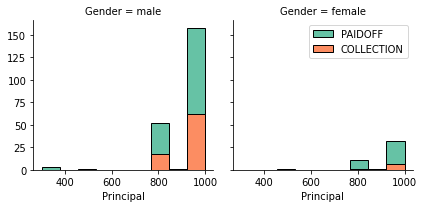

In [7]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10) #divide principal into 10 categories
g = sns.FacetGrid(df, col = 'Gender', hue ='loan_status', palette = 'Set2', legend_out = True, col_wrap = 2)
g.map(plt.hist, 'Principal', bins = bins, ec = 'k')
g.axes[-1].legend()

plt.show()

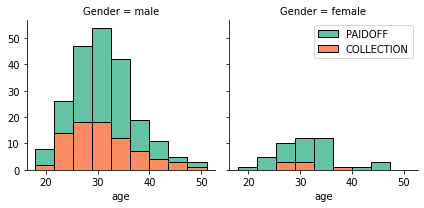

In [8]:
bins_age = np.linspace(df.age.min(), df.age.max(), 10) #divide principal into 10 categories
g = sns.FacetGrid(df, col = 'Gender', hue ='loan_status', palette = 'Set2', legend_out = True, col_wrap = 2)
g.map(plt.hist, 'age', bins = bins_age, ec ='k')
g.axes[-1].legend()

plt.show()

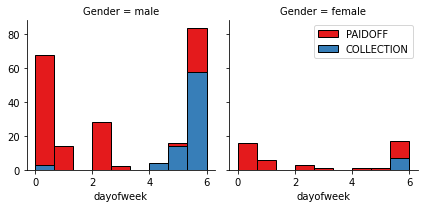

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
date_bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)

g = sns.FacetGrid(df, col = 'Gender', hue ='loan_status', palette='Set1', col_wrap = 2)
g.map(plt.hist, 'dayofweek', bins = date_bins, ec='k')
g.axes[-1].legend()

plt.show()

In [10]:
#from the above graph there are more defaults on weekends

df['weekend'] = df['dayofweek'].apply(lambda x : 1 if x>3 else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [12]:
df['Gender'] = df['Gender'].apply(lambda x : 0 if x == 'male' else 1)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize = True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [14]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [15]:
education = pd.get_dummies(df['education']).drop(['Master or Above'], axis = 1)
education.head()

,Bechalor,High School or Below,college
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [16]:
others = df[['Principal', 'terms', 'age', 'Gender', 'dayofweek']]
features = pd.concat([education, others], axis = 1)

In [17]:
features.head()

,Bechalor,High School or Below,college,Principal,terms,age,Gender,dayofweek
0,0,1,0,1000,30,45,0,3
1,1,0,0,1000,30,33,1,3
2,0,0,1,1000,15,27,0,3
3,0,0,1,1000,30,28,1,4
4,0,0,1,1000,30,29,0,4


In [18]:
X = features
y = df['loan_status']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X[0:5]

array([[-0.38170062,  1.13639374, -0.86968108,  0.51578458,  0.92071769,
         2.33152555, -0.42056004, -0.26122054],
       [ 2.61985426, -0.87997669, -0.86968108,  0.51578458,  0.92071769,
         0.34170148,  2.37778177, -0.26122054],
       [-0.38170062, -0.87997669,  1.14984679,  0.51578458, -0.95911111,
        -0.65321055, -0.42056004, -0.26122054],
       [-0.38170062, -0.87997669,  1.14984679,  0.51578458,  0.92071769,
        -0.48739188,  2.37778177,  0.12175534],
       [-0.38170062, -0.87997669,  1.14984679,  0.51578458,  0.92071769,
        -0.3215732 , -0.42056004,  0.12175534]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, jaccard_score, log_loss

from sklearn.model_selection import train_test_split

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 1)

### Logistic Regression

In [23]:
reg = LogisticRegression()
reg.fit(Xtrain, ytrain)
reg_pred = reg.predict(Xtest)

In [24]:
reg_pred[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION'],
      dtype=object)

In [25]:
reg_proba = reg.predict_proba(Xtest)
reg_proba[0:5]

array([[0.44519827, 0.55480173],
       [0.01863703, 0.98136297],
       [0.48292822, 0.51707178],
       [0.48169742, 0.51830258],
       [0.52320389, 0.47679611]])

Classification report 

In [26]:
print(classification_report(ytest, reg_pred))

              precision    recall  f1-score   support

  COLLECTION       0.60      0.12      0.21        24
     PAIDOFF       0.79      0.97      0.87        80

    accuracy                           0.78       104
   macro avg       0.69      0.55      0.54       104
weighted avg       0.74      0.78      0.72       104



### Decision Tree Classifier

In [27]:
tree = DecisionTreeClassifier()
tree.fit(Xtrain, ytrain)
tree_pred = tree.predict(Xtest)
tree_pred[0:5]

array(['COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [28]:
tree_proba = tree.predict_proba(Xtest)
tree_proba[0:5]

array([[0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ]])

In [29]:
print(classification_report(ytest, tree_pred))

              precision    recall  f1-score   support

  COLLECTION       0.38      0.33      0.36        24
     PAIDOFF       0.81      0.84      0.82        80

    accuracy                           0.72       104
   macro avg       0.59      0.59      0.59       104
weighted avg       0.71      0.72      0.71       104



### K Nearest Neighbors

In [40]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xtrain, ytrain)
knn_pred = knn.predict(Xtest)
knn_pred[0:5]

array(['COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [31]:
knn_proba = knn.predict_proba(Xtest)
knn_proba[0:5]

array([[0.6, 0.4],
       [0. , 1. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6]])

In [32]:
print(classification_report(ytest, knn_pred))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.38      0.43        24
     PAIDOFF       0.83      0.89      0.86        80

    accuracy                           0.77       104
   macro avg       0.66      0.63      0.64       104
weighted avg       0.75      0.77      0.76       104




### Support Vector Classifier



In [33]:
svc = SVC(probability = True)
svc.fit(Xtrain, ytrain)
svc_pred = svc.predict(Xtest)
svc_pred[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [34]:
svc_proba = svc.predict_proba(Xtest)
svc_proba[0:5]

array([[0.24456136, 0.75543864],
       [0.2348245 , 0.7651755 ],
       [0.26959548, 0.73040452],
       [0.24301081, 0.75698919],
       [0.2529081 , 0.7470919 ]])

In [35]:
print(classification_report(ytest, svc_pred))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        24
     PAIDOFF       0.77      1.00      0.87        80

    accuracy                           0.77       104
   macro avg       0.38      0.50      0.43       104
weighted avg       0.59      0.77      0.67       104



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression has the highest accuracy of 0.78